In [1]:
import requests
import os
from datetime import datetime
from pathlib import Path
import pyarrow

In [2]:
# URL of the file to download
url = "https://hub.arcgis.com/api/v3/datasets/025fb2ea05f14890b2b11573341b5b18_0/downloads/data?format=geojson&spatialRefId=4326&where=1%3D1"


In [3]:
# Directory to save the downloaded file
output_dir = "/Volumes/squirrel-utopia 1/los_angeles_2025_fire_disasters_exp/los_angeles_2025_fire_disasters_exp/data/calfire_boundaries"

In [4]:
# Generate a filename with the current date
filename = f"data_{datetime.now().strftime('%Y_%m_%d')}.geojson"
output_path = os.path.join(output_dir, filename)
print(filename)
print(output_path)

data_2025_01_14.geojson
/Volumes/squirrel-utopia 1/los_angeles_2025_fire_disasters_exp/los_angeles_2025_fire_disasters_exp/data/calfire_boundaries/data_2025_01_14.geojson


In [5]:
# Download the file
response = requests.get(url)
response.raise_for_status()  # Check if the request was successful

In [6]:
# view response
print(response.headers)

{'Date': 'Tue, 14 Jan 2025 20:13:30 GMT', 'Content-Type': 'application/json', 'Content-Length': '21940200', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Last-Modified': 'Tue, 14 Jan 2025 16:04:21 GMT', 'ETag': '"d1149e6d9c4c183ce672ed173300fcaa-5"', 'x-amz-server-side-encryption': 'AES256', 'Cache-Control': 'must-revalidate', 'x-amz-meta-cachetime': '952423', 'Content-Disposition': 'attachment; filename="CA_Perimeters_NIFC_FIRIS_public_view.geojson"', 'Content-Encoding': 'gzip', 'x-amz-meta-contentlastmodified': '2025-01-14T07:20:16.440Z', 'Strict-Transport-Security': 'max-age=31536000', 'X-Content-Type-Options': 'nosniff', 'Content-Security-Policy': 'upgrade-insecure-requests'}


In [7]:
with open(output_path, "wb") as file:
    file.write(response.content)

print(f"File downloaded and saved as {output_path}")

File downloaded and saved as /Volumes/squirrel-utopia 1/los_angeles_2025_fire_disasters_exp/los_angeles_2025_fire_disasters_exp/data/calfire_boundaries/data_2025_01_14.geojson


In [8]:
# read that file and plot it
import geopandas as gpd
import matplotlib.pyplot as plt

gdf = gpd.read_file(output_path)
 

<Axes: >

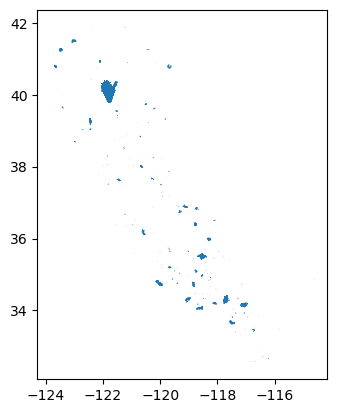

In [9]:
   

# plot
gdf.plot()

In [10]:
print(gdf)


      OBJECTID                              GlobalID            type source  \
0            1  4c658021-4a6a-43b1-989a-ed8ad74c8737  Heat Perimeter   NIFC   
1            2  8633c474-5701-47cb-9650-53f66778e374  Heat Perimeter  FIRIS   
2            4  d38f2804-59d5-4529-8475-67434070fc20  Heat Perimeter  FIRIS   
3            6  fa0e7fb1-08cf-4aa5-942c-81b300d02ccf  Heat Perimeter  FIRIS   
4            7  7485825a-c647-43d7-b43f-7b2b7a56c570  Heat Perimeter  FIRIS   
...        ...                                   ...             ...    ...   
1200      1287  6d49f57d-5702-45f2-a1b3-e36a8e1ed97c  Heat Perimeter   NIFC   
1201      1288  1f59de11-923c-4081-8145-c9152cd4d865  Heat Perimeter  FIRIS   
1202      1289  b4d14153-fb41-4e5e-8be6-4d910df154b6  Heat Perimeter  FIRIS   
1203      1290  77e24e42-336b-4743-8a60-ae9b5cb26aa1  Heat Perimeter  FIRIS   
1204      1291  65fddb93-6376-436a-8f3e-176d5d38e416  Heat Perimeter  FIRIS   

                     poly_DateCurrent              

In [11]:
# print column names
print(gdf.columns)
# print head
print(gdf.head())
# get class of poly_DateC
print(gdf['poly_DateCurrent'].dtype)
# view whole dataset
print(gdf)


# filter to dates january 7th or later
#gdf['datetime'] = pd.to_datetime(gdf['datetime'])

Index(['OBJECTID', 'GlobalID', 'type', 'source', 'poly_DateCurrent', 'mission',
       'incident_name', 'incident_number', 'area_acres', 'description',
       'FireDiscoveryDate', 'CreationDate', 'EditDate', 'displayStatus',
       'geometry'],
      dtype='object')
   OBJECTID                              GlobalID            type source  \
0         1  4c658021-4a6a-43b1-989a-ed8ad74c8737  Heat Perimeter   NIFC   
1         2  8633c474-5701-47cb-9650-53f66778e374  Heat Perimeter  FIRIS   
2         4  d38f2804-59d5-4529-8475-67434070fc20  Heat Perimeter  FIRIS   
3         6  fa0e7fb1-08cf-4aa5-942c-81b300d02ccf  Heat Perimeter  FIRIS   
4         7  7485825a-c647-43d7-b43f-7b2b7a56c570  Heat Perimeter  FIRIS   

                  poly_DateCurrent              mission incident_name  \
0        2024-02-11 10:33:27+00:00    2024-CACDD-002185          IRIS   
1        2024-02-21 21:08:25+00:00   CA-RVC-PALMAS-N40Y          None   
2 2024-04-04 12:35:09.631000+00:00  CA-BDU-CARTAGO-N43U  

In [12]:
# going to treat polydate as the relevant date
# sort shape to only include dates after january 6th
gdf = gdf[gdf['poly_DateCurrent'] > '2025-01-06']


<Axes: >

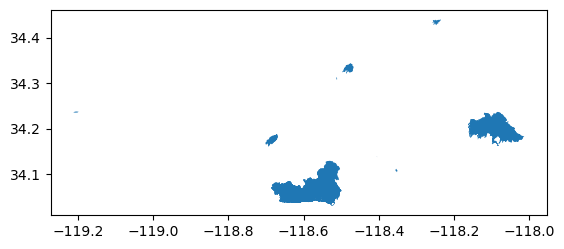

In [13]:
# plot
gdf.plot()

In [26]:
import pyarrow
# read in zctas from data folder
zctas = gpd.read_parquet('/Volumes/squirrel-utopia 1/los_angeles_2025_fire_disasters_exp/los_angeles_2025_fire_disasters_exp/data/zctas_2020.parquet')

<Axes: >

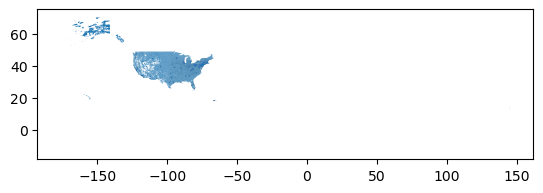

In [22]:
# plot
zctas.plot()

In [27]:
# find zcta crs
print(zctas.crs)
# find fire crs
print(gdf.crs)

GEOGCRS["GCS_North_American_1983",
    DATUM["D_North_American_1983",
        ELLIPSOID["GRS_1980",6378137,298.257222101,
            LENGTHUNIT["metre",1,
                ID["EPSG",9001]]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["Degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["longitude",east,
            ORDER[1],
            ANGLEUNIT["Degree",0.0174532925199433]],
        AXIS["latitude",north,
            ORDER[2],
            ANGLEUNIT["Degree",0.0174532925199433]]]
GEOGCRS["GCS_North_American_1983",
    DATUM["D_North_American_1983",
        ELLIPSOID["GRS_1980",6378137,298.257222101,
            LENGTHUNIT["metre",1,
                ID["EPSG",9001]]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["Degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["longitude",east,
            ORDER[1],
            ANGLEUNIT["Degree",0.0174532925199433]],
        AXIS["latitude",north,
            ORDER[2],
            ANGLEUNIT["Degree",0.0174532925199433

In [28]:
# convert fires to zcta crs
gdf = gdf.to_crs(zctas.crs)


In [29]:
# add column which is area of each zcta
zctas['zcta_area'] = zctas.area

/var/folders/8y/9yw138b95kjd5wjs3my5vy900000gn/T/ipykernel_25049/128566475.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zctas['zcta_area'] = zctas.area


<Axes: >

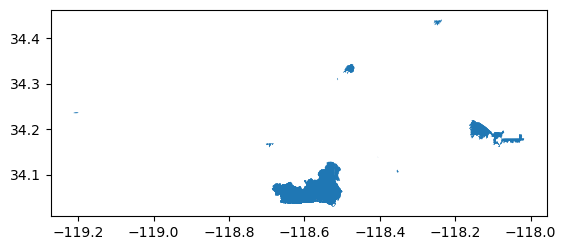

In [38]:
# intersect zctas with fires 
zctas_fires = gpd.overlay(zctas, gdf, how='intersection')
# plot
zctas_fires.plot()

In [39]:
# add column which is area of intersection
zctas_fires['zcta_fire_intersection_area'] = zctas_fires.area

/var/folders/8y/9yw138b95kjd5wjs3my5vy900000gn/T/ipykernel_25049/3410830837.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zctas_fires['zcta_fire_intersection_area'] = zctas_fires.area


In [40]:
# view the zctas_fires dataframe
print(zctas_fires)

    ZCTA5CE20 GEOID20 CLASSFP20 MTFCC20 FUNCSTAT20      ALAND20  AWATER20  \
0       91001   91001        B5   G6350          S   21393347.0   91219.0   
1       91001   91001        B5   G6350          S   21393347.0   91219.0   
2       91001   91001        B5   G6350          S   21393347.0   91219.0   
3       91001   91001        B5   G6350          S   21393347.0   91219.0   
4       91302   91302        B5   G6350          S   71094708.0  116015.0   
..        ...     ...       ...     ...        ...          ...       ...   
103     91342   91342        B5   G6350          S  117701198.0   80521.0   
104     91342   91342        B5   G6350          S  117701198.0   80521.0   
105     91342   91342        B5   G6350          S  117701198.0   80521.0   
106     93510   93510        B5   G6350          S  207399594.0   35388.0   
107     93003   93003        B5   G6350          S   53832749.0  242915.0   

      INTPTLAT20    INTPTLON20  zcta_area  ...  incident_name incident_numb

In [41]:
# from zctas_fires, select zcta name, zcta area, and zcta fire intersection area, and fire name
zctas_fires = zctas_fires[['ZCTA5CE20', 'zcta_area', 'zcta_fire_intersection_area', 'incident_name', 'geometry']]

In [45]:
# drop geometery of zctas_fires
#zctas_fires = zctas_fires.drop(columns='geometry')
#  group by zcta and sum the variable zcta_fire_intersection_area
zctas_fires_sum = zctas_fires.groupby('ZCTA5CE20').agg({
    'zcta_fire_intersection_area': 'sum',
    'zcta_area': 'first'  # or 'mean', 'max', etc., depending on your needs
}).reset_index()



In [ ]:
print(zctas_fires_sum)

In [47]:
# add col which is zcta_fire_intersection_area / zcta_area
zctas_fires_sum['fire_area_ratio'] = zctas_fires_sum['zcta_fire_intersection_area'] / zctas_fires_sum['zcta_area'] * 100

In [ ]:
print(zctas_fires_sum)

In [50]:
# rename ZCTA5CE20 to zcta
zctas_fires_sum = zctas_fires_sum.rename(columns={'ZCTA5CE20': 'zcta'})

In [48]:
# read in kaiser zips
import pandas as pd
kaiser_zips = pd.read_csv('/Volumes/squirrel-utopia 1/los_angeles_2025_fire_disasters_exp/los_angeles_2025_fire_disasters_exp/data/kpsc_zcta_counts.csv')

In [53]:
# change zcta to character type
kaiser_zips['zcta'] = kaiser_zips['zcta'].astype(str)
# change in zcta_fires_sum to character type
zctas_fires_sum['zcta'] = zctas_fires_sum['zcta'].astype(str)

In [ ]:
print(kaiser_zips)

In [54]:
# left join kaiser zips to zctas_fires_sum
zctas_fires_sum = zctas_fires_sum.merge(kaiser_zips, how='left')

In [ ]:
print(zctas_fires_sum)

In [ ]:
# change the fire area ratio to max out at 100 - zctas where it's higher 
# have that bc of the way the ZCTA file is set up
zctas_fires_sum['fire_area_ratio'] = zctas_fires_sum['fire_area_ratio'].clip(upper=100)

# make a new col fire_area_ratio times kaiser count
zctas_fires_sum['ppl_affected'] = zctas_fires_sum['fire_area_ratio'] * zctas_fires_sum['kpsc_pop_age_60p']

In [59]:
# remove column classification
#zctas_fires_sum = zctas_fires_sum.drop(columns='classification')

# sort descending by ppl affected
zctas_fires_sum = zctas_fires_sum.sort_values(by='ppl_affected', ascending=False)
# round ppl affected up to the nearest integer
zctas_fires_sum['ppl_affected'] = zctas_fires_sum['ppl_affected'].apply(lambda x: round(x))

# write as csv
zctas_fires_sum.to_csv('/Volumes/squirrel-utopia 1/los_angeles_2025_fire_disasters_exp/los_angeles_2025_fire_disasters_exp/data/num_kaiser_pop_age_60_affected_la_wf.csv', index=False)